# Importing the required Libraries

In [2]:
import matplotlib.pyplot as plt
import os
from keras_preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam

# Displaying Images

In [3]:
image_size = 48
folder_path = "./data"

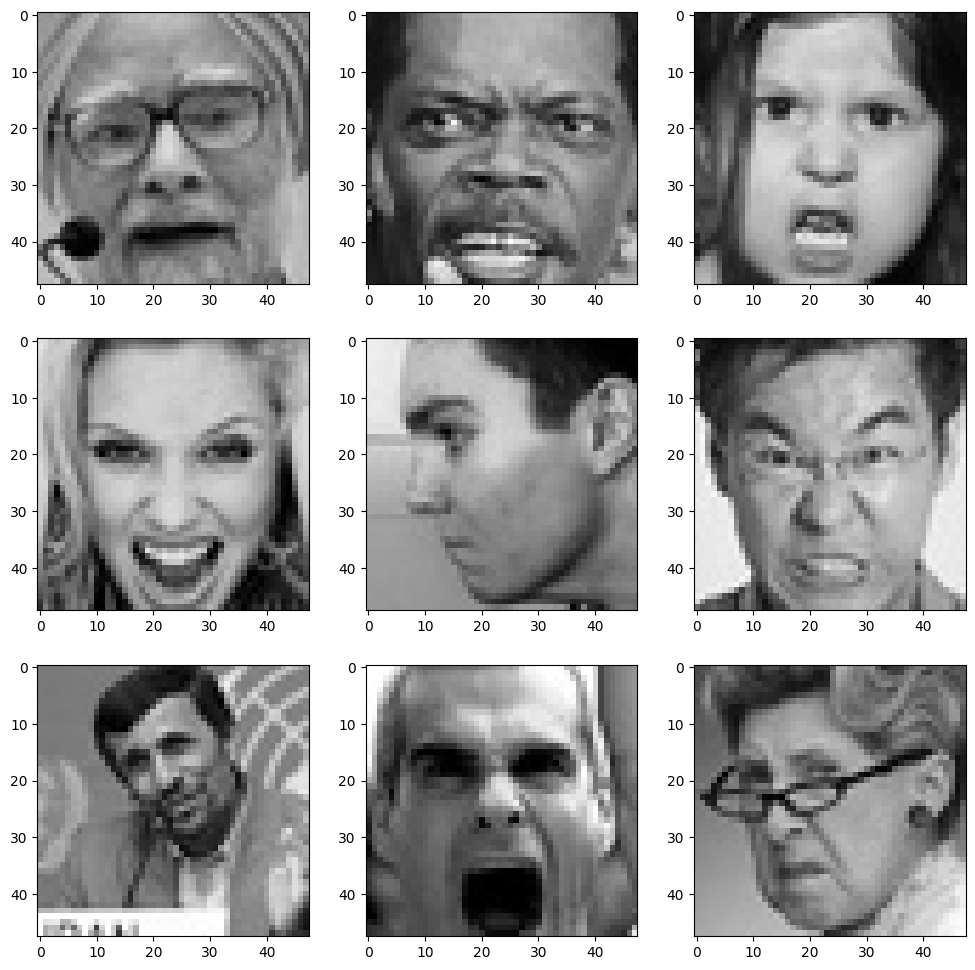

In [5]:
# expression = 'disgust'
expression = 'angry'
plt.figure(figsize = (12,12))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)
    img = load_img(folder_path + "/train/" + expression + "/" +
                  os.listdir(folder_path + "/train/" + expression)[i], target_size = (image_size, image_size))
    plt.imshow(img)   
plt.show()

# Making Training and Testing Data Ready

In [7]:
batch_size  = 128

datagen_train = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_data = datagen_train.flow_from_directory(folder_path + "/train",
                                              target_size = (image_size,image_size),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)


test_data = datagen_val.flow_from_directory(folder_path + "/test",
                                              target_size = (image_size,image_size),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


# Model Building

In [8]:
from keras.optimizers import Adam,SGD,RMSprop


no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

# Flatten the array to 1-D to give input to fully connected layer
model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation = 'softmax'))


# Model Training

In [9]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.keras", monitor = 'val_acc', verbose = 1, save_best_only = True, mode = 'max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(learning_rate = 0.001),
              metrics = ['accuracy'])

In [10]:
model_history = model.fit(train_data,
                    steps_per_epoch = train_data.n // train_data.batch_size,
                    epochs = epochs,
                    validation_data = test_data,
                    validation_steps = test_data.n // test_data.batch_size,
                    callbacks = callbacks_list
                    )

Epoch 1/48
225/225 [==============================] - 11s 41ms/step - loss: 1.7852 - accuracy: 0.3093 - val_loss: 2.0836 - val_accuracy: 0.2936 - lr: 0.0010
Epoch 2/48
225/225 [==============================] - 9s 38ms/step - loss: 1.4440 - accuracy: 0.4419 - val_loss: 1.5423 - val_accuracy: 0.4037 - lr: 0.0010
Epoch 3/48
225/225 [==============================] - 8s 37ms/step - loss: 1.2773 - accuracy: 0.5095 - val_loss: 1.3615 - val_accuracy: 0.4909 - lr: 0.0010
Epoch 4/48
225/225 [==============================] - 8s 37ms/step - loss: 1.1933 - accuracy: 0.5497 - val_loss: 1.2214 - val_accuracy: 0.5391 - lr: 0.0010
Epoch 5/48
225/225 [==============================] - 8s 37ms/step - loss: 1.1259 - accuracy: 0.5736 - val_loss: 1.1401 - val_accuracy: 0.5712 - lr: 0.0010
Epoch 6/48
225/225 [==============================] - 8s 36ms/step - loss: 1.0777 - accuracy: 0.5910 - val_loss: 1.2263 - val_accuracy: 0.5298 - lr: 0.0010
Epoch 7/48
225/225 [==============================] - 8s 36ms/s

# Plotting Accuracy & Loss

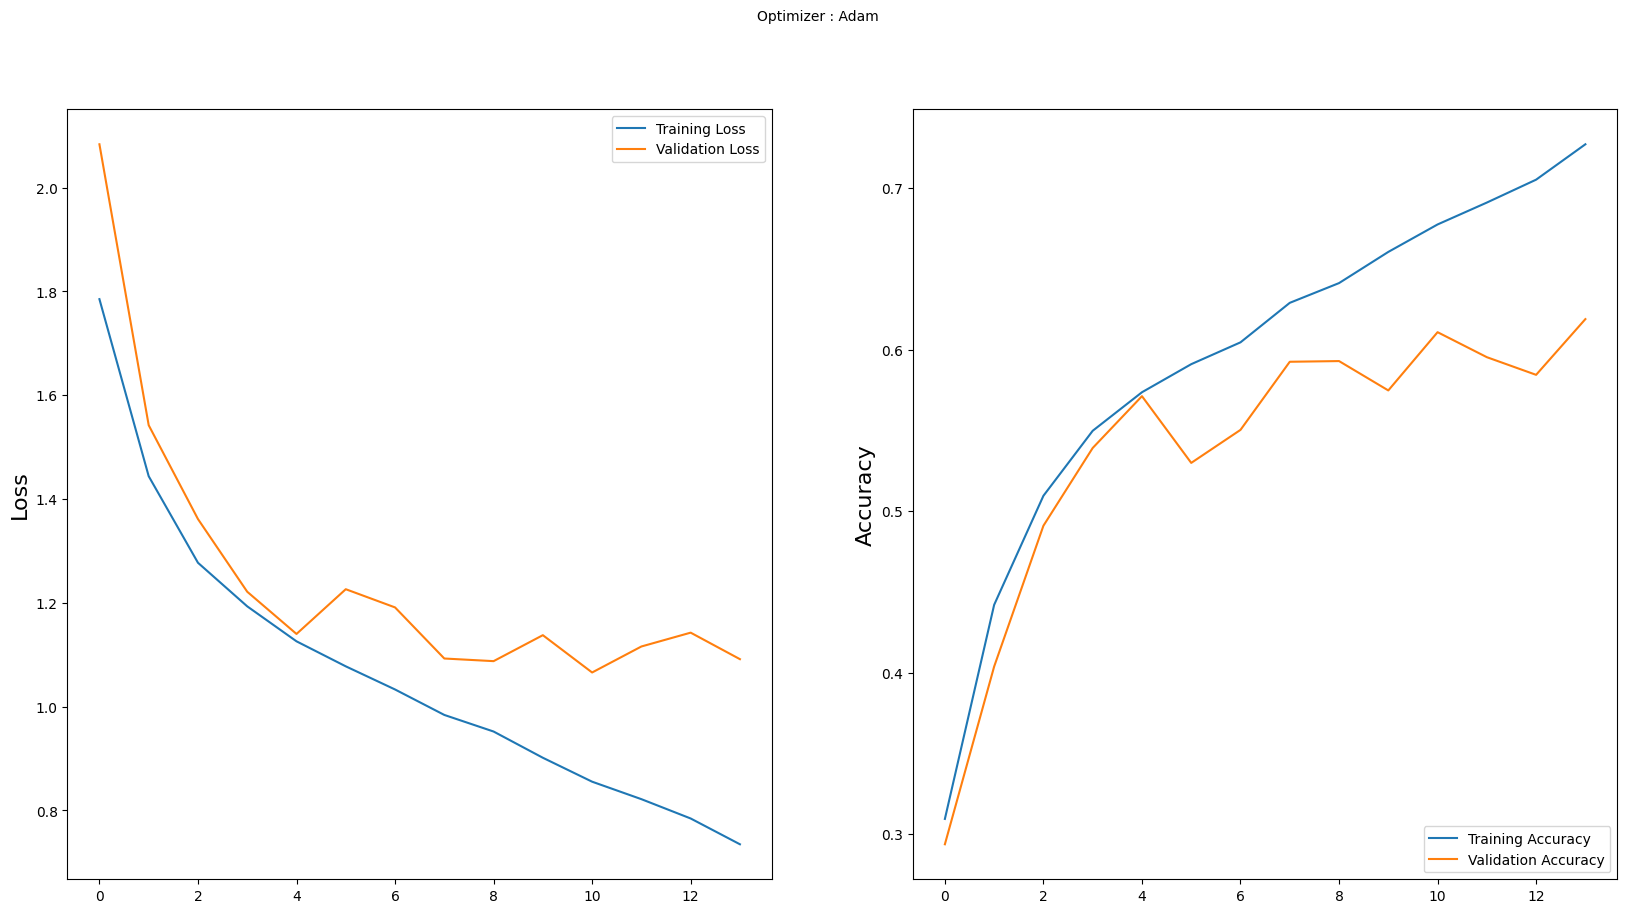

In [11]:
plt.figure(figsize = (20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize = 10)
plt.ylabel('Loss', fontsize = 16)
plt.plot(model_history.history['loss'], label = 'Training Loss')
plt.plot(model_history.history['val_loss'], label = 'Validation Loss')
plt.legend(loc = 'upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize = 16)
plt.plot(model_history.history['accuracy'], label = 'Training Accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.show()

In [12]:
model.save_weights(r'C:\Users\USER\Documents\GitHub\Facial-Expressions\model.h5')

In [13]:
from tensorflow.keras.models import save_model

save_model(model, 'model.h5')
